In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import logging
import pickle
import glob

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from recnn.preprocessing import permute_by_pt
from recnn.preprocessing import extract

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

In [5]:
def load_test(filename_train, filename_test):
    # Make training data
    print("Loading training data...")

    fd = open(filename_train, "rb")
    X, y = pickle.load(fd)
    fd.close()
    indices = np.random.permutation(len(X))
    size = min(80000, len(X))
    X = [X[i] for i in indices[:size]]
    y = [y[i] for i in indices[:size]]
    y = np.array(y)

    print("\tfilename = %s" % filename_train)
    print("\tX size = %d" % len(X))
    print("\ty size = %d" % len(y))

    # Preprocessing 
    print("Preprocessing...")
    X = [extract(permute_by_pt(jet)) for jet in X]
    tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

    for jet in X:
        jet["content"] = tf.transform(jet["content"])

    # Make test data 
    print("Loading test data...")

    fd = open(filename_test, "rb")
    X, y = pickle.load(fd)
    fd.close()
    y = np.array(y)

    print("\tfilename = %s" % filename_test)
    print("\tX size = %d" % len(X))
    print("\ty size = %d" % len(y))

    # Preprocessing 
    print("Preprocessing...")
    X = [extract(permute_by_pt(jet)) for jet in X]

    for jet in X:
        jet["content"] = tf.transform(jet["content"])
        
#     # Cropping
#     X_ = [j for j in X if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]
#     y_ = [y[i] for i, j in enumerate(X) if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]

#     X = X_
#     y = y_
    
    print("\tX size = %d" % len(X))
    print("\ty size = %d" % len(y))
        
    return X, y

Loading training data...
	filename = ../data/z/anti-kt/antikt-train.pickle-py27-kt
	X size = 58946
	y size = 58946
Preprocessing...
Loading test data...
	filename = ../data/z/anti-kt/antikt-test.pickle-py27-kt
	X size = 20000
	y size = 20000
Preprocessing...
	X size = 20000
	y size = 20000
Loading ../models/join/z-kt-2.pickle
(0.79203438500000001, '../models/join/z-kt-2.pickle')
Loading ../models/join/z-kt-1.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in divide


(0.79177385499999997, '../models/join/z-kt-1.pickle')
Loading ../models/join/z-kt-3.pickle
(0.79401212499999985, '../models/join/z-kt-3.pickle')
Loading ../models/join/z-kt-5.pickle
(0.79384737000000005, '../models/join/z-kt-5.pickle')
Loading ../models/join/z-kt-4.pickle
(0.79241799499999999, '../models/join/z-kt-4.pickle')
roc_auc(kt) = 0.7928 +- 0.0009
Loading training data...
	filename = ../data/z/anti-kt/antikt-train.pickle-py27-anti-kt
	X size = 58946
	y size = 58946
Preprocessing...
Loading test data...
	filename = ../data/z/anti-kt/antikt-test.pickle-py27-anti-kt
	X size = 20000
	y size = 20000
Preprocessing...
	X size = 20000
	y size = 20000
Loading ../models/join/z-anti-kt-5.pickle
(0.78640388999999999, '../models/join/z-anti-kt-5.pickle')
Loading ../models/join/z-anti-kt-1.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:82: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:84: RuntimeWarning: divide by zero encountered in divide


(0.787086175, '../models/join/z-anti-kt-1.pickle')
Loading ../models/join/z-anti-kt-3.pickle
(0.78529724499999998, '../models/join/z-anti-kt-3.pickle')
Loading ../models/join/z-anti-kt-4.pickle
(0.78612055999999986, '../models/join/z-anti-kt-4.pickle')
Loading ../models/join/z-anti-kt-2.pickle
(0.78368970000000004, '../models/join/z-anti-kt-2.pickle')
roc_auc(anti-kt) = 0.7857 +- 0.0012
Loading ../models/join/z-join-2.pickle
(0.78895446499999999, '../models/join/z-join-2.pickle')
Loading ../models/join/z-join-4.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:115: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:117: RuntimeWarning: divide by zero encountered in divide


(0.78776461999999992, '../models/join/z-join-4.pickle')
Loading ../models/join/z-join-5.pickle
(0.79483104500000012, '../models/join/z-join-5.pickle')
Loading ../models/join/z-join-1.pickle
(0.79543995999999995, '../models/join/z-join-1.pickle')
Loading ../models/join/z-join-3.pickle
(0.79055997999999994, '../models/join/z-join-3.pickle')
roc_auc(kt+anti-kt) = 0.7915 +- 0.0031


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


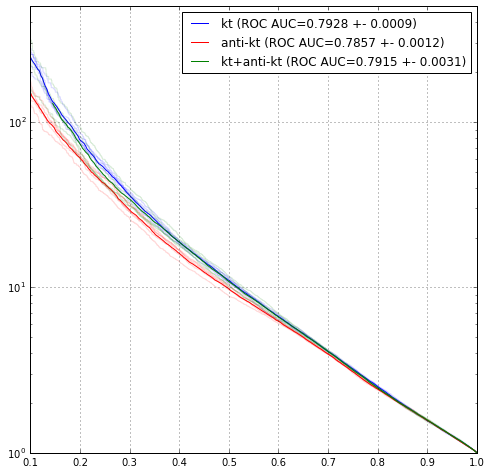

In [7]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob
from scipy import interp


def predict(X, filename):
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    y_pred = grnn_predict_simple(params, X)
    
    return y_pred


def predict_join(X1, X2, filename):
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    y_pred = grnn_predict_simple_join(params, X1, X2)
    
    return y_pred


# Plot KT 
s = "kt"
color = "b"
X1, y = load_test("../data/z/anti-kt/antikt-train.pickle-py27-%s" % s,
                  "../data/z/anti-kt/antikt-test.pickle-py27-%s" % s) 
X = X1

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/join/z-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="%s (ROC AUC=%.4f +- %.4f)" % (s, np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


# Plot Anti-KT 
s = "anti-kt"
color = "r"
X2, y = load_test("../data/z/anti-kt/antikt-train.pickle-py27-%s" % s,
                 "../data/z/anti-kt/antikt-test.pickle-py27-%s" % s) 
X = X2

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/join/z-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="%s (ROC AUC=%.4f +- %.4f)" % (s, np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


# Plot join
from recnn.recnn import grnn_predict_simple_join

s = "kt+anti-kt"
color = "g"

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/join/z-join-[0-9]*.pickle"):
    print("Loading %s" % f)

    y_pred = predict_join(X1, X2, f)
    rocs.append(roc_auc_score(y, y_pred))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="%s (ROC AUC=%.4f +- %.4f)" % (s, np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


plt.xlim([0.1, 1.0])
plt.ylim(1, 500)
plt.yscale("log")
plt.legend(loc="best")
plt.grid()
plt.show()

Loading training data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-train.pickle-py27-kt
	X size = 80000
	y size = 80000
Preprocessing...
Loading test data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-test.pickle-py27-kt
	X size = 20000
	y size = 20000
Preprocessing...
	X size = 20000
	y size = 20000
Loading ../models/join/w-kt-4.pickle
(0.8873400800000002, '../models/join/w-kt-4.pickle')
Loading ../models/join/w-kt-3.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in divide


(0.88798954500000005, '../models/join/w-kt-3.pickle')
Loading ../models/join/w-kt-1.pickle
(0.88936329999999986, '../models/join/w-kt-1.pickle')
Loading ../models/join/w-kt-5.pickle
(0.88811034999999994, '../models/join/w-kt-5.pickle')
Loading ../models/join/w-kt-2.pickle
(0.88567977000000009, '../models/join/w-kt-2.pickle')
roc_auc(kt) = 0.8877 +- 0.0012
Loading training data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-train.pickle-py27-anti-kt
	X size = 80000
	y size = 80000
Preprocessing...
Loading test data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-test.pickle-py27-anti-kt
	X size = 20000
	y size = 20000
Preprocessing...
	X size = 20000
	y size = 20000
Loading ../models/join/w-anti-kt-5.pickle
(0.87822673999999989, '../models/join/w-anti-kt-5.pickle')
Loading ../models/join/w-anti-kt-4.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:82: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:84: RuntimeWarning: divide by zero encountered in divide


(0.87834904000000014, '../models/join/w-anti-kt-4.pickle')
Loading ../models/join/w-anti-kt-2.pickle
(0.87935051499999994, '../models/join/w-anti-kt-2.pickle')
Loading ../models/join/w-anti-kt-1.pickle
(0.87891064000000008, '../models/join/w-anti-kt-1.pickle')
Loading ../models/join/w-anti-kt-3.pickle
(0.87714416500000003, '../models/join/w-anti-kt-3.pickle')
roc_auc(anti-kt) = 0.8784 +- 0.0007
Loading ../models/join/w-join-3.pickle
(0.88582084999999999, '../models/join/w-join-3.pickle')
Loading ../models/join/w-join-4.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:115: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:117: RuntimeWarning: divide by zero encountered in divide


(0.88457160999999995, '../models/join/w-join-4.pickle')
Loading ../models/join/w-join-1.pickle
(0.8861212249999999, '../models/join/w-join-1.pickle')
Loading ../models/join/w-join-5.pickle
(0.88602987499999997, '../models/join/w-join-5.pickle')
Loading ../models/join/w-join-2.pickle
(0.8856866699999999, '../models/join/w-join-2.pickle')
roc_auc(kt+anti-kt) = 0.8856 +- 0.0006


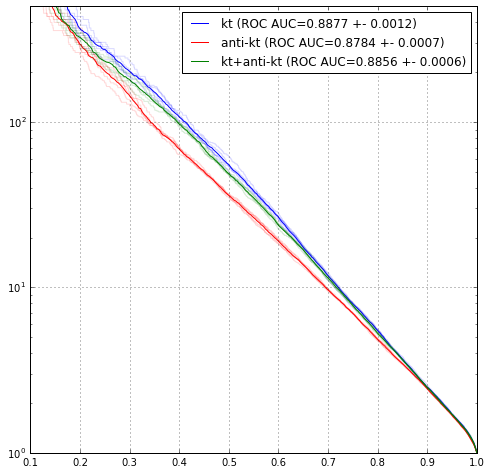

In [8]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob
from scipy import interp


def predict(X, filename):
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    y_pred = grnn_predict_simple(params, X)
    
    return y_pred


def predict_join(X1, X2, filename):
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    y_pred = grnn_predict_simple_join(params, X1, X2)
    
    return y_pred


# Plot KT 
s = "kt"
color = "b"
X1, y = load_test("../data/w-vs-qcd/anti-kt/antikt-train.pickle-py27-%s" % s,
                  "../data/w-vs-qcd/anti-kt/antikt-test.pickle-py27-%s" % s) 
X = X1

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/join/w-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="%s (ROC AUC=%.4f +- %.4f)" % (s, np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


# Plot Anti-KT 
s = "anti-kt"
color = "r"
X2, y = load_test("../data/w-vs-qcd/anti-kt/antikt-train.pickle-py27-%s" % s,
                 "../data/w-vs-qcd/anti-kt/antikt-test.pickle-py27-%s" % s) 
X = X2

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/join/w-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="%s (ROC AUC=%.4f +- %.4f)" % (s, np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


# Plot join
from recnn.recnn import grnn_predict_simple_join

s = "kt+anti-kt"
color = "g"

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/join/w-join-[0-9]*.pickle"):
    print("Loading %s" % f)

    y_pred = predict_join(X1, X2, f)
    rocs.append(roc_auc_score(y, y_pred))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="%s (ROC AUC=%.4f +- %.4f)" % (s, np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


plt.xlim([0.1, 1.0])
plt.ylim(1, 500)
plt.yscale("log")
plt.legend(loc="best")
plt.grid()
plt.show()